
# **Pequeño análisis de la competencia**
## **Autor: Lilia Karen Rivera Escovar**

## Estudiante: Esnil Josue Guevara Mendoza


El objetivo de este proyecto es aplicar tecnicas de clusterización y obtener información de lugares mediante el uso de la API de google


# Carga de librerías

In [1]:
import pandas as pd
import numpy as np
# import seaborn as 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

import warnings
warnings.filterwarnings("ignore")

#! pip install shapely
#! pip install folium
#! pip install geopandas seaborn
import multiprocessing
from sklearn.cluster import DBSCAN
import plotly.express as px
import folium
from PIL import Image, ImageDraw
import time
import warnings
from shapely.geometry import Point
from geopandas import GeoDataFrame
import itertools

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
dir = 'D:/Descargas/Python-API-GoogleMap/API_Google/'
df_isste = pd.read_csv( dir + 'hospitales_issste.csv',  encoding='latin1')
df_hospitales = pd.read_csv( dir + 'hospitales-y-centros-de-salud.csv',  encoding='latin1')

# **Lectura de información**

In [4]:
df_isste.head()

,id,geo_point_2d,geo_shape,objectid_1,nombre,y_latitud,x_longitu,e_hos_seg,e_h_s_ano
0,0,"19.4846832962,-99.1363064788","{""type"": ""Point"", ""coordinates"": [-99.13630647...",2,H. G. P. No. 3-A MAGDALENA DE LAS SALINAS 2N,19.484683,-99.136306,NaN,S/D
1,1,"19.4797919996,-99.1886539997","{""type"": ""Point"", ""coordinates"": [-99.18865399...",8,Hospital de Gineco-Obstetricia con Medicina Fa...,19.479792,-99.188654,NaN,S/D
2,2,"19.4551689999,-99.1403889998","{""type"": ""Point"", ""coordinates"": [-99.14038899...",24,"Hospital de Gineco Obstetricia Tlatelolco ""Hos...",19.455169,-99.140389,NaN,S/D
3,3,"19.404598614,-99.1112466757","{""type"": ""Point"", ""coordinates"": [-99.11124667...",53,"Hospital General de Zona No. 2A ""Troncoso""",19.404599,-99.111247,NaN,2018
4,4,"19.2982719997,-99.0220820002","{""type"": ""Point"", ""coordinates"": [-99.02208200...",56,Unidad MÃ©dica de AtenciÃ³n Ambulatoria No. 162,19.298272,-99.022082,NaN,S/D


In [5]:
df_isste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            25 non-null     int64  
 1   geo_point_2d  25 non-null     object 
 2   geo_shape     25 non-null     object 
 3   objectid_1    25 non-null     int64  
 4   nombre        25 non-null     object 
 5   y_latitud     25 non-null     float64
 6   x_longitu     25 non-null     float64
 7   e_hos_seg     11 non-null     object 
 8   e_h_s_ano     25 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ KB


In [6]:
df_hospitales.head()

,alcaldia,colonia,nombre,titular,tel,direccion,latitud,longitud
0,GUSTAVO A. MADERO,GRANJAS MODERNAS-SAN JUAN DE ARAGON (AMPL),Hospital General La Villa,Director: Dr. Enrique GarduÃ±o Salvador,55 77 88 67,"Av. San Juan de AragÃ³n No 28, Col. Granjas Mo...",19.480774,-99.103371
1,MILPA ALTA,VILLA MILPA ALTA (PBLO),Hospital General Milpa Alta,NaN,NaN,Dr.BenjamÃ­n Ortega Romero,19.200199,-99.011253
2,GUSTAVO A. MADERO,LA PURISIMA TICOMAN (BARR),Hospital General TicomÃ¡n,Director: Dr. Carlos Vazquez Noriega,57 54 39 79,"Plan de San Luis S/n, Col. TicomÃ¡n DelegaciÃ³...",19.514547,-99.138245
3,MIGUEL HIDALGO,SANTO TOMAS,Hospital General Dr. RubÃ©n LeÃ±ero,Director: Dr. JosÃ© Alfredo JimÃ©nez Douglas,53 41 17 93,"Plan de San Luis y DÃ­az MirÃ³n, Col. Casco de...",19.450987,-99.169189
4,IZTAPALAPA,SANTA MARIA AZTAHUACAN (U HAB),Hospital General Iztapalapa C.E.E.,Director: Dr. BenjamÃ­n MÃ©ndez Pinto,54293212,"Avenida Ermita Iztapalapa no. 3018, Col. Citla...",19.343451,-99.027863


In [7]:
df_hospitales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   alcaldia   27 non-null     object 
 1   colonia    27 non-null     object 
 2   nombre     27 non-null     object 
 3   titular    25 non-null     object 
 4   tel        26 non-null     object 
 5   direccion  27 non-null     object 
 6   latitud    27 non-null     float64
 7   longitud   27 non-null     float64
dtypes: float64(2), object(6)
memory usage: 1.8+ KB


# **Mapa de la CDMX**

## **Visualizando los hospitales del ISSSTE**

In [8]:
mapa_cdmx= folium.Map(location=[df_isste.iloc[0]['y_latitud'], df_isste.iloc[0]['x_longitu']],
                      popup= 'Hospital:(' + str( df_isste.iloc[0]['nombre']) + ')',
                      fill_opacity=.70,
                      fill_color = 'red'    
                      )

In [9]:
for x in range(0,len(df_isste)): ## gcoor_x	gcoor_y
       folium.CircleMarker(
          location=(df_isste.iloc[x]['y_latitud'], df_isste.iloc[x]['x_longitu']),
          popup= 'Hospital:(' + str( df_isste.iloc[x]['nombre']) + ')',
          fill_opacity=.70,
          color = 'blue',
          fill_color= 'blue'
       ).add_to(mapa_cdmx)

In [16]:
mapa_cdmx

## **Visualizamos los hospitales generales**

In [11]:
for x in range(0,len(df_hospitales)): ## gcoor_x	gcoor_y
       folium.CircleMarker(
          location=(df_hospitales.iloc[x]['latitud'], df_hospitales.iloc[x]['longitud']),
          popup= 'Hospital:(' + str( df_hospitales.iloc[x]['nombre']) + ')',
          fill_opacity=.70,
          color = 'gray',
         fill_color= 'red'
       ).add_to(mapa_cdmx)

In [12]:
mapa_cdmx

## **Límites de la república mexicana**

In [82]:
#Las coordenadas del territorio mexicano son:
#Por el norte posee 32° 43´ 06´´ de latitud norte, en el Monumento 206. 
#En el Sur cuenta con 14° 32´ 27´´ de latitud norte, en la desembocadura del río Suchiate, frontera con Guatemala que constituye el extremo meridional. 
#Por el Este tiene 86° 42´ 36´´de longitud oeste, en el extremo suroeste de la Isla Mujeres. 
#En el Oeste presenta 118° 27´ 24´´ de longitud oeste, en sitio llamado Punta Roca Elefante de la Isla de Guadalupe, en el Océano Pacífico.

# Fuente: Mapa de México con coordenadas geográficas
# https://www.mapademexico.com.mx/mapa-de-mexico-con-coordenadas-geograficas
# https://paratodomexico.com/geografia-de-mexico/ubicacion-geografica.html

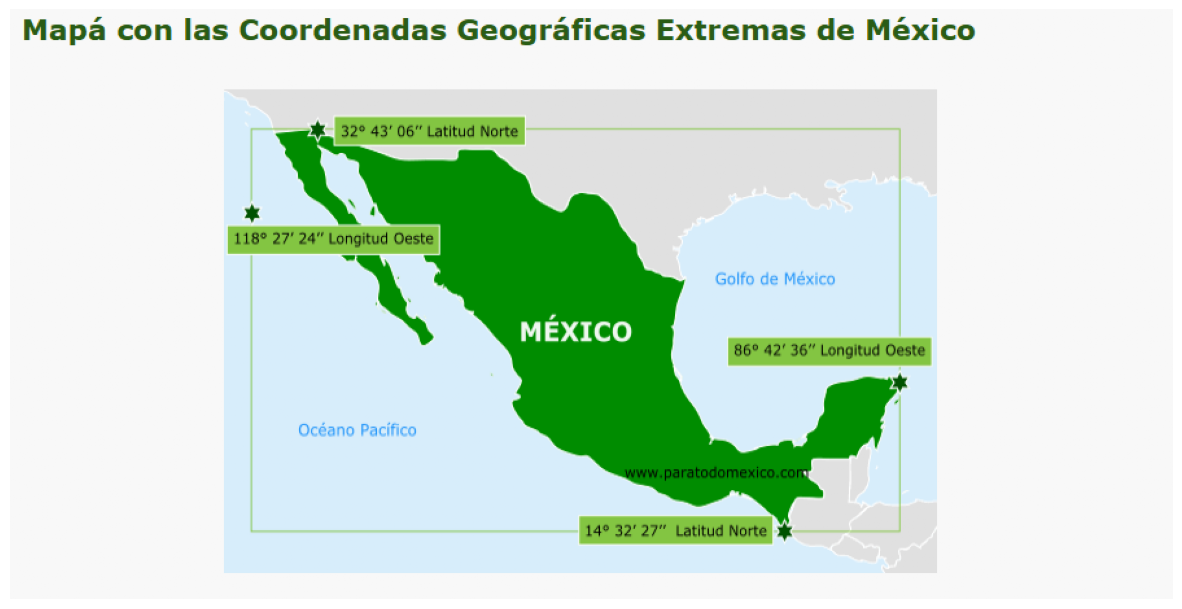

In [17]:
img = mpimg.imread('limite republica.png')
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes
plt.show()

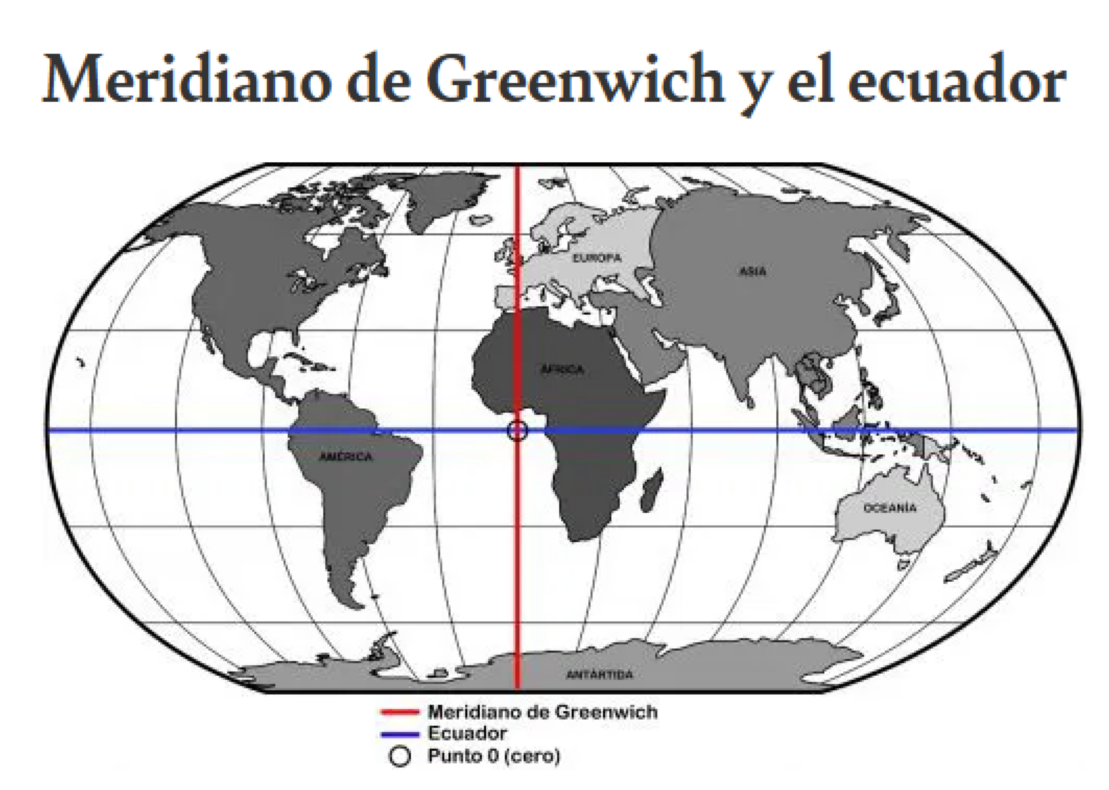

In [18]:
img = mpimg.imread('greenwich_ecuador.png')
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [15]:
# Función para convertir coordenadas de gradosminutos-segundos a sistema decimal
def gms_a_decimal(grados, minutos, segundos, direccion):
    decimal = grados + minutos / 60 + segundos / 3600
    if direccion in ['S', 'O']:  # Si es Sur u Oeste, es negativo
        decimal = decimal * (-1)
    return decimal

###### Breviario cultural
# Latitud (Norte - Sur)
# Se mide desde 0° en el Ecuador hasta +90° en el Polo Norte y -90° en el Polo Sur..
# Valores positivos (+) en el Hemisferio Norte (N).
# Valores negativos (-) en el Hemisferio Sur (S).
# ------------------------------------------------------------------------------
# Longitud (Este-Oeste):
# Se mide desde 0° en el Meridiano de Greenwich hasta +180° al este y -180° al oeste.
# Longitud positiva (+)  Hemisferio Este (Ej: Europa, Asia).
# Longitud negativa (-) Hemisferio Oeste (Ej: América).



In [16]:
# Ejemplo de uso
latitud = gms_a_decimal(32, 43, 6, 'N')
latitud_2 = gms_a_decimal(14, 32, 27, 'N')
longitud = gms_a_decimal(86, 42, 36, 'O')
longitud_2 = gms_a_decimal(118, 27, 24, 'O')

print(latitud)
print(latitud_2)
print(longitud)
print(longitud_2)


32.718333333333334
14.540833333333333
-86.71000000000001
-118.45666666666666


In [17]:
# Filtremoms nuestras bases y veammos que en efecto las ubicaciones tienen sentido
print(f'las dimensiones de la base del isste es {df_isste.shape}')
print(f'las dimensiones de la base de hospitales es {df_hospitales.shape}')

las dimensiones de la base del isste es (25, 9)
las dimensiones de la base de hospitales es (27, 8)


In [18]:
# Los l´mites geográficos de la repúblia se pueden encontrar en la siguiente liga del INEGI
# https://cuentame.inegi.org.mx/mapas/pdf/nacional/coordenadas/coord-byn-n.pdf
# Latitud Norte: 32.7183° N
# Latitud Sur: 14.5408° N
# Longitud Este: -86.7100° O
# Longitud Oeste: -118.4567° O

df_hospitales= df_hospitales[(df_hospitales['longitud'] > -118.37) | (df_hospitales['longitud']< -86.72)]
df_hospitales = df_hospitales[(df_hospitales['latitud'] > 14.55) | (df_hospitales['latitud']< 32.72)]

In [19]:
df_isste= df_isste[(df_isste['x_longitu'] > -118.37) | (df_isste['x_longitu']< -86.72)]
df_isste = df_isste[(df_isste['y_latitud'] > 14.55) | (df_isste['y_latitud']< 32.72)]

In [20]:
print(f'las dimensiones de la base del isste es {df_isste.shape}')
print(f'las dimensiones de la base de hospitales es {df_hospitales.shape}')

las dimensiones de la base del isste es (25, 9)
las dimensiones de la base de hospitales es (27, 8)


# **Convertir la latitud y longitud a coordenadas euclidianas**

### Frecuentemente es más fácil trabajar las coordenadas geográficas en términos de coodenadas euclidianas (Mercator)

La **proyección de Mercator** convierte **coordenadas geográficas (latitud, longitud)** en **coordenadas cartesianas (X, Y)** en un plano 2D.

La formula de Mercator es la siguiente:
**Fórmula de Mercator**
Dado un punto con coordenadas geográficas:
- **Latitud** $ \phi $ en grados
- **Longitud** $ \lambda $ en grados

La conversión a coordenadas en el **plano de Mercator** se hace con:

$
x = R \cdot \lambda_{\text{rad}}
$

$
y = R \cdot \ln\left( \tan\left( \frac{\pi}{4} + \frac{\phi_{\text{rad}}}{2} \right) \right)
$

**Donde:**
- $ R $ = Radio de la Tierra en metros (**6378137 m** en Web Mercator).
- $ \lambda_{\text{rad}} = \lambda \times \frac{\pi}{180} $ → **Longitud en radianes**.
- $ \phi_{\text{rad}} = \phi \times \frac{\pi}{180} $ → **Latitud en radianes**.
- $ \ln() $ → **Logaritmo natural**.


In [29]:
# Vamoss a generar una función que nos ayude a transformar las coordenas en grados  a coordenadas euclidianas

# Este es el radio de la Tierra, para que las coordenadas que obtengamos sea en metros, se utiliza otra dimensión si deseamos que sea en km (usado en Web Mercator)
R = 6378137
def latlon_a_mercator(lat, lon, R=R):
    x = R * np.radians(lon)  # Longitud a metros
    y = R * np.log(np.tan(np.pi / 4 + np.radians(lat) / 2))  # Latitud a metros
    return np.float64(x), np.float64(y)


In [30]:
# Vamos a generar el regreso, es decir de tener coordenadsa euclidianas(Mercator) a coordenadas decimales
# Esto será útil para cuando realicemos ejerccicios de clusterizacion, obtengamos resultados en el sistema auclideo y 
# querramos pasarlas a 
R = 6378137
def mercator_a_latlon(x, y, R=R):
    lon = np.degrees(x / R)  # Convertir de metros a grados
    lat = np.degrees(np.arctan(np.sinh(y / R)))  # Latitud inversa de Mercator
    return np.float64(lat), np.float64(lon)

In [31]:
# Ejercicio de transformación

# Coordenadas originales de la Ciudad de México
cdmx_lat, cdmx_lon = 19.432608, -99.133209

# Convertimos a Coordenadas Euclideas/Mercator
y_cdmx, x_cdmx = latlon_a_mercator(cdmx_lat, cdmx_lon)
print(f"Coordenada X: {x_cdmx:.6f}, Coordenada Y: {y_cdmx:.6f}")

# Convertimos de vuelta a Latitud/Longitud
lat_recuperada, lon_recuperada = mercator_a_latlon(y_cdmx, x_cdmx)
print(f"Latitud recuperada: {lat_recuperada:.6f}, Longitud recuperada: {lon_recuperada:.6f}")

Coordenada X: 2205935.305312, Coordenada Y: -11035458.346583
Latitud recuperada: 19.432608, Longitud recuperada: -99.133209


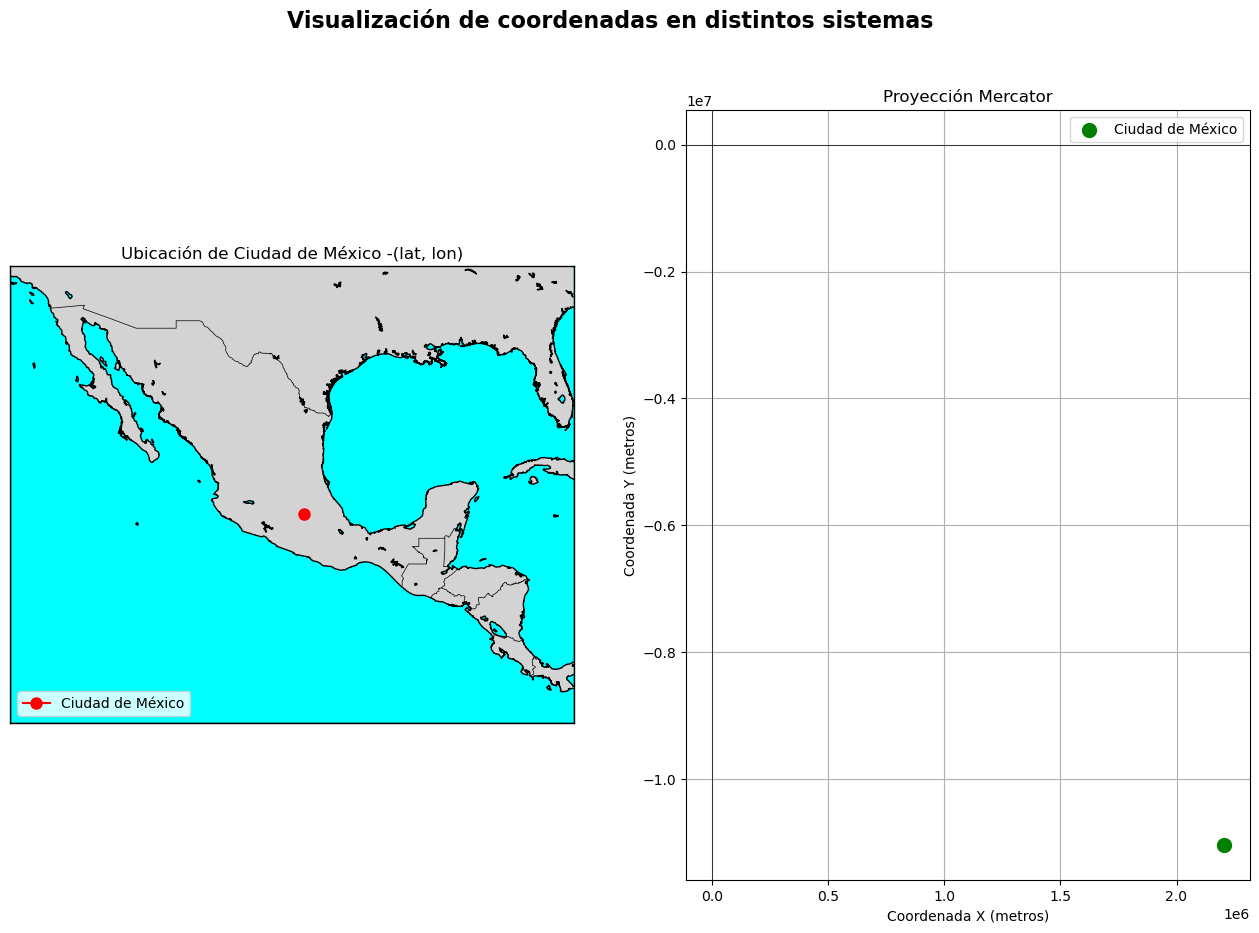

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig, axes = plt.subplots(1, 2, figsize=(16, 10))  # Visualización a un renglón dos oclumnas

### mapa
ax1 = axes[0]
m = Basemap(projection='merc', llcrnrlon=-120, llcrnrlat=5, urcrnrlon=-80, urcrnrlat=35, resolution='i', ax=ax1)

# Dibuja moscontinentes, países y líneas de costa
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Convertimos la latitud y longitud a coordenadas del mapa
x_map, y_map = m(cdmx_lon, cdmx_lat)
m.plot(x_map, y_map, marker='o', color='red', markersize=8, label="Ciudad de México")
ax1.set_title("Ubicación de Ciudad de México -(lat, lon)")
ax1.legend()

### 📊 **Subplot 2: Proyección Mercator en un Plano Cartesiano**
ax2 = axes[1]


ax2.scatter(x_cdmx, y_cdmx, color="green", s=100, label="Ciudad de México")

# Etiquetas y formato del gráfico
ax2.set_xlabel("Coordenada X (metros)")
ax2.set_ylabel("Coordenada Y (metros)")
ax2.set_title("Proyección Mercator")
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.legend()
ax2.grid()

# Agregar un título general a la figura
fig.suptitle("Visualización de coordenadas en distintos sistemas", fontsize=16, fontweight='bold')

# Mostrar la figura con ambos gráficos
plt.show()


## **La importancia de los decimales**

CIMAT --- (lat: 21.042210388893878, lon: -101.26048727367123)\
Otra ubicación --- (lat: 21.043130554594857, lon: -101.26114676573945)

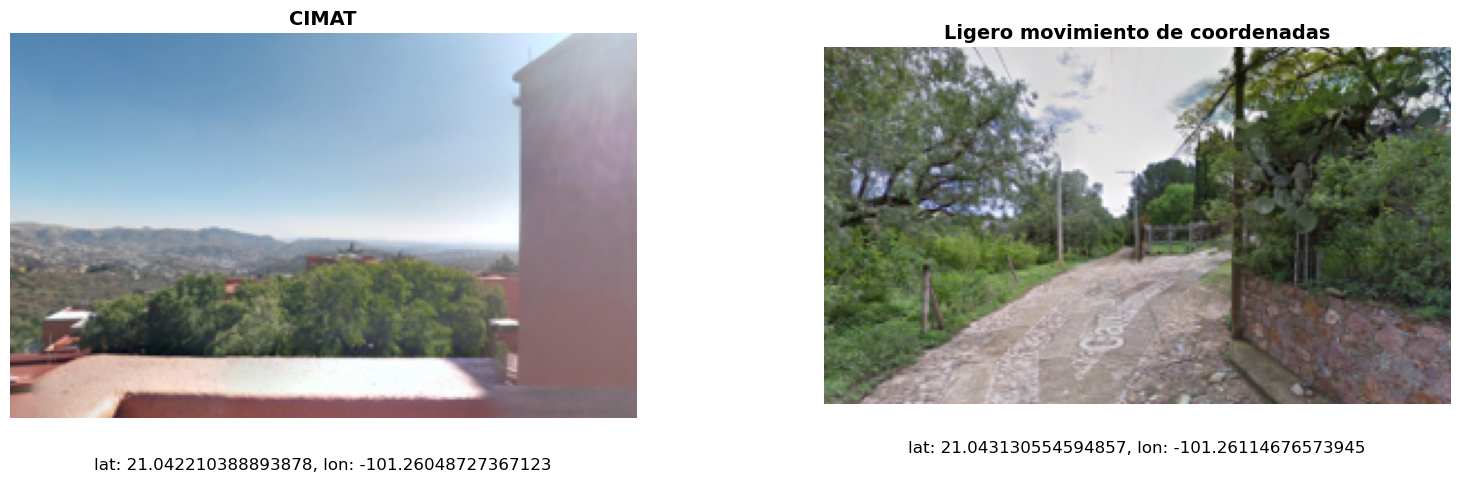

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

img = mpimg.imread('CIMAT.png')  
img2 = mpimg.imread('afura_cimat.png')  


plt.subplots_adjust(top=0.8, bottom=0.1, left=0.05, right=0.95, wspace=0.3)

axes[0].imshow(img)
axes[0].axis('off')  
axes[0].set_title("CIMAT", fontsize=14, fontweight='bold')
axes[0].text(0.5, -0.1, "lat: 21.042210388893878, lon: -101.26048727367123", fontsize=12, ha='center', va='top', transform=axes[0].transAxes)


axes[1].imshow(img2)
axes[1].axis('off') 
axes[1].set_title("Ligero movimiento de coordenadas", fontsize=14, fontweight='bold')
axes[1].text(0.5, -0.1, "lat: 21.043130554594857, lon: -101.26114676573945", fontsize=12, ha='center', va='top', transform=axes[1].transAxes)
plt.show()



# **Distancia entre coordenadas**

Para poder calcular la ditancia entre dos coordenadas utilizamos la fórmula de haversine.\
La **fórmula de Haversine** se usa para calcular la distancia más corta entre dos puntos en la **superficie de una esfera**, teniendo en cuenta la curvatura de la Tierra.

 **Fórmula Matemática**
$$
d = 2R \cdot \arcsin\left(\sqrt{\sin^2\left(\frac{\Delta \phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\Delta \lambda}{2}\right)}\right)
$$

Donde:
- $ d $ = distancia entre los dos puntos (en kilómetros o metros).
- $ R $ = radio de la Tierra (aproximadamente **6371 km** o  **6378137 metros**).
- $ \phi_1, \phi_2 $ = latitudes de los dos puntos en **radianes**.
- $ \lambda_1, \lambda_2 $ = longitudes de los dos puntos en **radianes**.
- $ \Delta \phi = \phi_2 - \phi_1 $ = diferencia de latitudes.
- $ \Delta \lambda = \lambda_2 - \lambda_1 $ = diferencia de longitudes.


**Explicación Paso a Paso de la Fórmula de Haversine**

- Convertimos las coordenadas de grados a radianes
La fórmula usa radianes, por lo que primero convertimos las latitudes y longitudes:

$
\text{radianes} = \text{grados} \times \frac{\pi}{180}
$

- Calculamos la diferencia de coordenadas
Restamos las latitudes y longitudes:

$
\Delta \phi = \phi_2 - \phi_1, \quad \Delta \lambda = \lambda_2 - \lambda_1
$

- Aplicamos la fórmula de Haversine

Calculamos el término **a**:
$
a = \sin^2\left(\frac{\Delta \phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\Delta \lambda}{2}\right)
$

Calculamos el ángulo central **c**:
$
c = 2 \cdot \arcsin\left(\sqrt{a}\right)
$

- Multiplicamos por el radio de la Tierra
Finalmente, obtenemos la distancia real:

$
d = R \cdot c
$

Donde:
- $ R = 6371 $ km (radio medio de la Tierra).
- $ R = 6378137 $ metros (radio medio de la Tierra).
- $ d $ es la distancia en kilómetros entre los dos puntos.



In [37]:
def haversine_m(lat1, lon1, lat2, lon2, R=6378137):
    # Convertir grados a radianes
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Diferencias de coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))

    # Distancia final en METROS
    distancia_metros = R * c
    return distancia_metros


In [38]:
lat1, lon1 = 19.432608, -99.133209  # Ciudad de México
lat2, lon2 = 40.712776, -74.005974  # Nueva York

distancia_m = haversine_m(lat1, lon1, lat2, lon2)
print(f"Distancia: {distancia_m:.2f} metros")

Distancia: 3363146.38 metros


# **Lectura de información con Google**

### Busquemos laboratorios médicos que estén cerca de cada hospital de las bases originales 

In [39]:
df_hospitales.head()

,alcaldia,colonia,nombre,titular,tel,direccion,latitud,longitud
0,GUSTAVO A. MADERO,GRANJAS MODERNAS-SAN JUAN DE ARAGON (AMPL),Hospital General La Villa,Director: Dr. Enrique GarduÃ±o Salvador,55 77 88 67,"Av. San Juan de AragÃ³n No 28, Col. Granjas Mo...",19.480774,-99.103371
1,MILPA ALTA,VILLA MILPA ALTA (PBLO),Hospital General Milpa Alta,NaN,NaN,Dr.BenjamÃ­n Ortega Romero,19.200199,-99.011253
2,GUSTAVO A. MADERO,LA PURISIMA TICOMAN (BARR),Hospital General TicomÃ¡n,Director: Dr. Carlos Vazquez Noriega,57 54 39 79,"Plan de San Luis S/n, Col. TicomÃ¡n DelegaciÃ³...",19.514547,-99.138245
3,MIGUEL HIDALGO,SANTO TOMAS,Hospital General Dr. RubÃ©n LeÃ±ero,Director: Dr. JosÃ© Alfredo JimÃ©nez Douglas,53 41 17 93,"Plan de San Luis y DÃ­az MirÃ³n, Col. Casco de...",19.450987,-99.169189
4,IZTAPALAPA,SANTA MARIA AZTAHUACAN (U HAB),Hospital General Iztapalapa C.E.E.,Director: Dr. BenjamÃ­n MÃ©ndez Pinto,54293212,"Avenida Ermita Iztapalapa no. 3018, Col. Citla...",19.343451,-99.027863


In [44]:
import googlemaps

# Inicialización de clase

In [53]:
class Gmaps_Search():
    # El primer paso es crear una clase y asociarle dos atributos principales, a saber, api_key y place_type.
    # El primero se utiliza para contener la clave API del usuario necesaria para autenticar el uso de las API de Google,
    # mientras que el segundo contiene el tipo de establecimiento que nos interesa.

    # initialize class by defining api key and search query constaints
    def __init__(self, api_key, place_type):
        self.key = api_key
        self.type = place_type

    # A continuación, definimos un método llamado search_query() que contendría el código que puede aceptar consultas como entrada
    #  y devolver la lista de ubicaciones como salida. Para tener acceso a los servicios de Google, 
    # primero debemos autenticar nuestra solicitud proporcionando una clave API única de la siguiente manera:

    # define function to search query and return results
    def search_query(self,df):
        # authenticate user
        gmaps = googlemaps.Client(key=self.key)

        # Ahora que tenemos acceso a las API de Google, podemos comenzar a realizar una solicitud. 
        # En concreto, necesitamos las coordenadas de latitud y longitud de la ciudad que nos interesa. 
        # Para ello, simplemente llamamos a la función find_place()y le proporcionamos los tres argumentos necesarios. 
        # El primer argumento debe contener la consulta en forma de cadena. 
        # Para evitar la posibilidad de que se encuentren resultados fuera de Filipinas, incluiremos la cadena , Philippinescomo
        # parte de nuestra consulta. Como requiere una entrada adicional del usuario, añadimos el parámetro cityen el search_query() método.
        # A continuación, almacenaremos los resultados en las variables laty lngpara su uso posterior.

        # Se define un radio de búsqueda de 100 metros (ajustable según necesidades)
        radio = 100  

        # Se inicializa una lista vacía para almacenar los resultados de la búsqueda
        resultados = []

        # Se itera sobre cada hospital en el DataFrame df
        for i in range(0, len(df)):
            # Se realiza una búsqueda de lugares cercanos utilizando la API de Google Maps
            places_result = gmaps.places_nearby(
                location=(df.iloc[i]['latitud'], df.iloc[i]['longitud']),  # Coordenadas del hospital
                radius=radio,  # Radio de búsqueda
                keyword=self.type  # Término de búsqueda (ajustable según el análisis deseado)
            )
            
            # Se itera sobre los resultados de la búsqueda
            for place in places_result['results']:
                # Se extrae información relevante de cada lugar encontrado y se almacena en un diccionario
                resultados.append({
                    'nombre': place['name'],  # Nombre del laboratorio médico
                    'direccion': place.get('vicinity', 'Sin dirección'),  # Dirección (o 'Sin dirección' si no está disponible)
                    'estado': place.get('plus_code', {}).get('compound_code', 'Sin estado'),  # Estado o código compuesto (o 'Sin estado' si no está disponible)
                    'latitud': place['geometry']['location']['lat'],  # Latitud del lugar
                    'longitud': place['geometry']['location']['lng'],  # Longitud del lugar
                    'rating': place.get('rating', None),  # Calificación del lugar (o None si no está disponible)
                    'num_personas_califican': place.get('user_ratings_total', None)  # Número de personas que calificaron (o None si no está disponible)
                })

        # Se convierte la lista de resultados en un DataFrame de pandas y se retorna
        return pd.DataFrame(resultados)

In [ ]:
# Places API
key = "xxxx"

# initialized class to search for cafes
gmaps = Gmaps_Search(key,"laboratorio medico")

laboratorios = gmaps.search_query(df_hospitales)

In [57]:

# Places API

gmaps = googlemaps.Client(key)

radio = 100  
resultados = []

for i in range(0,len(df_hospitales)):
        places_result = gmaps.places_nearby(
            location=(df_hospitales.iloc[i]['latitud'], df_hospitales.iloc[i]['longitud']),
            radius=radio,
            keyword="laboratorio medico"  #Este témino se ajusta con base en el análisi que se quiera hacer
        )
    
        for place in places_result['results']:
            resultados.append({
                                'nombre': place['name'],
                                'direccion': place.get('vicinity', 'Sin dirección'),
                                'estado':place.get('plus_code', {}).get('compound_code', 'Sin estado'),
                                'latitud': place['geometry']['location']['lat'],
                                'longitud': place['geometry']['location']['lng'],
                                'rating': place.get('rating',None),
                                'num_personas_califican': place.get('user_ratings_total', None)
                            })

In [58]:
places_result

{'html_attributions': [],
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 19.2660278, 'lng': -99.0002705},
    'viewport': {'northeast': {'lat': 19.26744152989272,
      'lng': -98.99890537010728},
     'southwest': {'lat': 19.26474187010728, 'lng': -99.00160502989272}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png',
   'icon_background_color': '#7B9EB0',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/generic_pinlet',
   'name': 'Laboratorio Médico del Chopo Tulyehualco',
   'opening_hours': {'open_now': True},
   'photos': [{'height': 1440,
     'html_attributions': ['<a href="https://maps.google.com/maps/contrib/115245911300658017095">Elizabeth Cordova Villeda</a>'],
     'photo_reference': 'AUy1YQ2hGlvdg0v9Nj7CHR-f71r4rTTjZb_SH6TIeVi-mpRoA0zre3XU1LvuvOpb-G3dYEi-o00wi4YJLi49shu3P47wKaoWSqD7MCgLOC6-s_rMnSue_RMUCfr2bh6z3u7aXk-X3UsvGaxpCyMr8ug77Prf10Gtla0ca6OHF58N9us_E

In [59]:
laboratorios = pd.DataFrame(resultados)

In [60]:
laboratorios

,nombre,direccion,estado,latitud,longitud,rating,num_personas_califican
0,Diagnova Laboratorios,"Blvd. José López Portillo 5, Santa Cruz, Ciuda...","6X2Q+2H Mexico City, Mexico",19.200076,-99.011038,0.0,0
1,Laboratorios Clínicos Grupo DURAN Unidad Milpa...,"Blvd. Nuevo Leon Ote. 341, Santa Cruz, Villa M...","5XXQ+XC Milpa Alta, Mexico City, Mexico",19.199919,-99.011391,0.0,0
2,Análisis Clínicos del Dr. Simi,"Calz. Ticomán 1264, La Purísima Ticoman, Ciuda...","GV88+H2 Mexico City, Mexico",19.516385,-99.134995,4.6,9
3,Salud Digna Ticoman,"Calz. Ticomán 1264, La Purísima Ticoman, Ciuda...","GV88+H2 Mexico City, Mexico",19.516496,-99.134966,3.1,46
4,Laboratorio Medico Fracsa,"Ermita Iztapalapa #2864, Col. Pueblo de, Sta M...","8XV9+RW Mexico City, Mexico",19.344511,-99.030218,3.7,6
5,Laboratorio Jessaov,"Ermita Iztapalapa MZ125 LT2682, Sta María Azta...","8XV9+PV Mexico City, Mexico",19.344374,-99.030277,3.0,2
6,CAR·MAX,"Ermita Iztapalapa 2864, Sta María Aztahuacan, ...","8XV9+RW Mexico City, Mexico",19.344509,-99.030217,1.0,1
7,Laboratorio México en Bioanálisis,"Av. 5 66-Piso 1, Escuadrón 201, Ciudad de México","9V5Q+JJ Mexico City, Mexico",19.359057,-99.110972,5.0,16
8,LABORATORIO SAN AGUSTIN,"Av. Toltecas 106, Sta Bárbara, Ciudad de México","9V5W+Q5 Mexico City, Mexico",19.359420,-99.104478,0.0,0
9,Acceso Salud Cantera La Villa,"Cantera 121, Villa Gustavo A. Madero, Ciudad d...","FVPP+XM Mexico City, Mexico",19.487434,-99.113307,5.0,2


In [61]:
laboratorios.to_csv(dir + 'laboratorios_CDMX.csv', header= True)

In [62]:
radio = 100  
resultados_isste = []

for i in range(0,len(df_isste)):
        places_result = gmaps.places_nearby(
            location=(df_isste.iloc[i]['y_latitud'], df_isste.iloc[i]['x_longitu']),
            radius=radio,
            keyword="laboratorio medico"  #Este témino se ajusta con base en el análisi que se quiera hacer
        )
    
        for place in places_result['results']:
            resultados_isste.append({
                                'nombre': place['name'],
                                'direccion': place.get('vicinity', 'Sin dirección'),
                                'estado':place.get('plus_code', {}).get('compound_code', 'Sin estado'),
                                'latitud': place['geometry']['location']['lat'],
                                'longitud': place['geometry']['location']['lng'],
                                'rating': place.get('rating',None),
                                'num_personas_califican': place.get('user_ratings_total', None)
                            })

In [63]:
laboratorios_issste = pd.DataFrame(resultados_isste)
laboratorios_issste.to_csv(dir + 'laboratorios_issste.csv')

In [64]:
laboratorios_issste

,nombre,direccion,estado,latitud,longitud,rating,num_personas_califican
0,Lapi Laboratorio Médico Suc. Encuentro Fortuna,"Av Fortuna 334, Magdalena de las Salinas, Ciud...","FVM8+8P Mexico City, Mexico",19.483355,-99.133225,2.7,79
1,Laboratorio Médico Polanco - Azcapotzalco,"Av. 16 de Septiembre N.°33, Colonia Azcapotzal...","FRH7+5J Mexico City, Mexico",19.477978,-99.185877,4.2,164
2,Medical Laboratory Branch Chopo- Azcapotzalco,"Rayon 14, Centro de Azcapotzalco, Ciudad de Mé...","FRJ7+QR Mexico City, Mexico",19.481997,-99.185427,3.0,12
3,Laboratorio Médico del Chopo Tlatelolco,"Calz. de la Ronda 88, Ex Hipódromo de Peralvil...","FV46+6W Ex Hipódromo de Peralvillo, Mexico Cit...",19.455504,-99.137654,4.8,8
4,Oximed,"Eje 3 Ote (Azúcar), Granjas México, Ciudad de ...","CV3P+FH Mexico City, Mexico",19.403660,-99.113503,0.0,0
5,Quest Diagnostics CAP Lindavista,"Av Instituto Politécnico Nacional 1705, Lindav...","FVQ8+HG Mexico City, Mexico",19.488902,-99.133597,3.8,33
6,ProMédica Lab,"Av Ricarte 409, Lindavista Sur, Ciudad de México","FVQ7+HM Lindavista Sur, Mexico City, CDMX, Mexico",19.488893,-99.135875,5.0,10
7,Lapi Laboratorio Médico,"Félix Cuevas 374-Local 202, Tlacoquemecatl del...","9RFG+5W Mexico City, Mexico",19.372915,-99.172731,3.5,40
8,Laboratorio Olarte y Akle Del Valle,"Parroquia # 406-Loc. 8, Del Valle, Ciudad de M...","9RCG+56 Mexico City, Mexico",19.370393,-99.174397,3.1,32
9,Mi Central Médica Amores,"Amores 1402, Col. Del Valle, Ciudad de México","9RFJ+9C Mexico City, Mexico",19.373421,-99.168877,0.0,0


# **Grafiquemos los datos**

In [65]:
for x in range(0,len(laboratorios)): ## gcoor_x	gcoor_y
       folium.CircleMarker(
          location=(laboratorios.iloc[x]['latitud'], laboratorios.iloc[x]['longitud']),
          popup= 'Laboratorio:(' + str( laboratorios.iloc[x]['nombre']) + ')',
          fill_opacity=.70,
          color = 'gray',
          fill_color= 'green'
       ).add_to(mapa_cdmx)

In [66]:
for x in range(0,len(laboratorios_issste)): ## gcoor_x	gcoor_y
       folium.CircleMarker(
          location=(laboratorios_issste.iloc[x]['latitud'], laboratorios_issste.iloc[x]['longitud']),
          popup= 'Laboratorio:(' + str( laboratorios_issste.iloc[x]['nombre']) + ')',
          fill_opacity=.70,
          color = 'gray',
          fill_color= 'green'
       ).add_to(mapa_cdmx)

In [67]:
mapa_cdmx

# **Establezcamos zonas de atención**

Transformemos los datos a coordenadas euclidianas y apliquemos DBSCAN

### **Trabajo preliminar de datos**

In [68]:
## Generamos nuestra base de datos
df_hospitales.head()
df_hospitales [['nombre', 'direccion', 'latitud', 'longitud' ]]
#df_isste [['nombre', 'y_latitud','x_longitu'  ]]
#laboratorios[['nombre',	'direccion', 'latitud',	'longitud' ]]
#laboratorios_issste[['nombre','direccion' ,'latitud',	'longitud']]

,nombre,direccion,latitud,longitud
0,Hospital General La Villa,"Av. San Juan de AragÃ³n No 28, Col. Granjas Mo...",19.480774,-99.103371
1,Hospital General Milpa Alta,Dr.BenjamÃ­n Ortega Romero,19.200199,-99.011253
2,Hospital General TicomÃ¡n,"Plan de San Luis S/n, Col. TicomÃ¡n DelegaciÃ³...",19.514547,-99.138245
3,Hospital General Dr. RubÃ©n LeÃ±ero,"Plan de San Luis y DÃ­az MirÃ³n, Col. Casco de...",19.450987,-99.169189
4,Hospital General Iztapalapa C.E.E.,"Avenida Ermita Iztapalapa no. 3018, Col. Citla...",19.343451,-99.027863
5,Hospital PediÃ¡trico Iztapalapa,"Calzada Ermita Iztapalapa No. 780, Col. Granja...",19.356548,-99.107689
6,Hospital PediÃ¡trico Moctezuma,"Oriente 158 No. 189, Col. Moctezuma 2da. Secci...",19.432852,-99.098358
7,Hospital PediÃ¡trico CoyoacÃ¡n,"Moctezuma No. 18, Col. Del Carmen CoyoacÃ¡n, D...",19.345737,-99.167725
8,Hospital PediÃ¡trico San Juan de AragÃ³n,"Av. 506 entre calle 517 y 521, Col. San Juan d...",19.457306,-99.092812
9,Hospital PediÃ¡trico Villa,"Avenida Cantera, Esq. Hidalgo S/n, Col. Estanz...",19.487551,-99.113876


In [69]:
# Renombraos las columnas del ISSSTE, parq eu coincidan 
df_isste.rename(columns={'y_latitud': 'latitud', 'x_longitu': 'longitud'}, inplace=True)

# Agregamos la columna 'direccion' a df_isste con valores nulos o vacíos
df_isste['direccion'] = None 

# Unimos los df
variables= ['nombre', 'direccion', 'latitud', 'longitud' ]
df_final = pd.concat([df_hospitales[variables], df_isste[variables], laboratorios[variables], laboratorios_issste[variables]], ignore_index=True)


In [71]:
df_final

,nombre,direccion,latitud,longitud
0,Hospital General La Villa,"Av. San Juan de AragÃ³n No 28, Col. Granjas Mo...",19.480774,-99.103371
1,Hospital General Milpa Alta,Dr.BenjamÃ­n Ortega Romero,19.200199,-99.011253
2,Hospital General TicomÃ¡n,"Plan de San Luis S/n, Col. TicomÃ¡n DelegaciÃ³...",19.514547,-99.138245
3,Hospital General Dr. RubÃ©n LeÃ±ero,"Plan de San Luis y DÃ­az MirÃ³n, Col. Casco de...",19.450987,-99.169189
4,Hospital General Iztapalapa C.E.E.,"Avenida Ermita Iztapalapa no. 3018, Col. Citla...",19.343451,-99.027863
...,...,...,...,...
115,"Biomedical Reference, Del Valle","Av. Félix Cuevas 329-PB, Col del Valle Sur, Ci...",19.372626,-99.174597
116,RinovaLab,"Moras 359, Tlacoquemecatl del Valle, Ciudad de...",19.375103,-99.173746
117,Pindel / Centro de Investigaciones Avanzadas e...,"Félix Cuevas 520-3er piso, Del Valle, Ciudad d...",19.372429,-99.171849
118,Laboratorio Médico del Chopo Tlatelolco,"Calz. de la Ronda 88, Ex Hipódromo de Peralvil...",19.455504,-99.137654


In [72]:
# Aplicamos la conversión a coordenadas Mercator
df_final[['id_coordy', 'id_coodx']] = df_final.apply(lambda row: latlon_a_mercator(row['latitud'], row['longitud']), axis=1, result_type='expand')

# Validamos que al regresar a lat/lon, obtenemos las coordenadas originales
df_final[['latitud_recuperada', 'longitud_recuperada']] = df_final.apply(
    lambda row: mercator_a_latlon(row['id_coordy'], row['id_coodx']), axis=1, result_type='expand'
)

df_final

,nombre,direccion,latitud,longitud,id_coordy,id_coodx,latitud_recuperada,longitud_recuperada
0,Hospital General La Villa,"Av. San Juan de AragÃ³n No 28, Col. Granjas Mo...",19.480774,-99.103371,-1.103214e+07,2.211622e+06,19.480774,-99.103371
1,Hospital General Milpa Alta,Dr.BenjamÃ­n Ortega Romero,19.200199,-99.011253,-1.102188e+07,2.178520e+06,19.200199,-99.011253
2,Hospital General TicomÃ¡n,"Plan de San Luis S/n, Col. TicomÃ¡n DelegaciÃ³...",19.514547,-99.138245,-1.103602e+07,2.215610e+06,19.514547,-99.138245
3,Hospital General Dr. RubÃ©n LeÃ±ero,"Plan de San Luis y DÃ­az MirÃ³n, Col. Casco de...",19.450987,-99.169189,-1.103946e+07,2.208105e+06,19.450987,-99.169189
4,Hospital General Iztapalapa C.E.E.,"Avenida Ermita Iztapalapa no. 3018, Col. Citla...",19.343451,-99.027863,-1.102373e+07,2.195414e+06,19.343451,-99.027863
...,...,...,...,...,...,...,...,...
115,"Biomedical Reference, Del Valle","Av. Félix Cuevas 329-PB, Col del Valle Sur, Ci...",19.372626,-99.174597,-1.104007e+07,2.198856e+06,19.372626,-99.174597
116,RinovaLab,"Moras 359, Tlacoquemecatl del Valle, Ciudad de...",19.375103,-99.173746,-1.103997e+07,2.199148e+06,19.375103,-99.173746
117,Pindel / Centro de Investigaciones Avanzadas e...,"Félix Cuevas 520-3er piso, Del Valle, Ciudad d...",19.372429,-99.171849,-1.103976e+07,2.198833e+06,19.372429,-99.171849
118,Laboratorio Médico del Chopo Tlatelolco,"Calz. de la Ronda 88, Ex Hipódromo de Peralvil...",19.455504,-99.137654,-1.103595e+07,2.208638e+06,19.455504,-99.137654


In [73]:
df_final = df_final.reset_index()
df_final.head(9)

,index,nombre,direccion,latitud,longitud,id_coordy,id_coodx,latitud_recuperada,longitud_recuperada
0,0,Hospital General La Villa,"Av. San Juan de AragÃ³n No 28, Col. Granjas Mo...",19.480774,-99.103371,-1.103214e+07,2.211622e+06,19.480774,-99.103371
1,1,Hospital General Milpa Alta,Dr.BenjamÃ­n Ortega Romero,19.200199,-99.011253,-1.102188e+07,2.178520e+06,19.200199,-99.011253
2,2,Hospital General TicomÃ¡n,"Plan de San Luis S/n, Col. TicomÃ¡n DelegaciÃ³...",19.514547,-99.138245,-1.103602e+07,2.215610e+06,19.514547,-99.138245
3,3,Hospital General Dr. RubÃ©n LeÃ±ero,"Plan de San Luis y DÃ­az MirÃ³n, Col. Casco de...",19.450987,-99.169189,-1.103946e+07,2.208105e+06,19.450987,-99.169189
4,4,Hospital General Iztapalapa C.E.E.,"Avenida Ermita Iztapalapa no. 3018, Col. Citla...",19.343451,-99.027863,-1.102373e+07,2.195414e+06,19.343451,-99.027863
5,5,Hospital PediÃ¡trico Iztapalapa,"Calzada Ermita Iztapalapa No. 780, Col. Granja...",19.356548,-99.107689,-1.103262e+07,2.196959e+06,19.356548,-99.107689
6,6,Hospital PediÃ¡trico Moctezuma,"Oriente 158 No. 189, Col. Moctezuma 2da. Secci...",19.432852,-99.098358,-1.103158e+07,2.205964e+06,19.432852,-99.098358
7,7,Hospital PediÃ¡trico CoyoacÃ¡n,"Moctezuma No. 18, Col. Del Carmen CoyoacÃ¡n, D...",19.345737,-99.167725,-1.103930e+07,2.195683e+06,19.345737,-99.167725
8,8,Hospital PediÃ¡trico San Juan de AragÃ³n,"Av. 506 entre calle 517 y 521, Col. San Juan d...",19.457306,-99.092812,-1.103096e+07,2.208851e+06,19.457306,-99.092812


In [74]:
df_final.rename(columns={'index': 'ID', }, inplace=True)

In [75]:
df_final

,ID,nombre,direccion,latitud,longitud,id_coordy,id_coodx,latitud_recuperada,longitud_recuperada
0,0,Hospital General La Villa,"Av. San Juan de AragÃ³n No 28, Col. Granjas Mo...",19.480774,-99.103371,-1.103214e+07,2.211622e+06,19.480774,-99.103371
1,1,Hospital General Milpa Alta,Dr.BenjamÃ­n Ortega Romero,19.200199,-99.011253,-1.102188e+07,2.178520e+06,19.200199,-99.011253
2,2,Hospital General TicomÃ¡n,"Plan de San Luis S/n, Col. TicomÃ¡n DelegaciÃ³...",19.514547,-99.138245,-1.103602e+07,2.215610e+06,19.514547,-99.138245
3,3,Hospital General Dr. RubÃ©n LeÃ±ero,"Plan de San Luis y DÃ­az MirÃ³n, Col. Casco de...",19.450987,-99.169189,-1.103946e+07,2.208105e+06,19.450987,-99.169189
4,4,Hospital General Iztapalapa C.E.E.,"Avenida Ermita Iztapalapa no. 3018, Col. Citla...",19.343451,-99.027863,-1.102373e+07,2.195414e+06,19.343451,-99.027863
...,...,...,...,...,...,...,...,...,...
115,115,"Biomedical Reference, Del Valle","Av. Félix Cuevas 329-PB, Col del Valle Sur, Ci...",19.372626,-99.174597,-1.104007e+07,2.198856e+06,19.372626,-99.174597
116,116,RinovaLab,"Moras 359, Tlacoquemecatl del Valle, Ciudad de...",19.375103,-99.173746,-1.103997e+07,2.199148e+06,19.375103,-99.173746
117,117,Pindel / Centro de Investigaciones Avanzadas e...,"Félix Cuevas 520-3er piso, Del Valle, Ciudad d...",19.372429,-99.171849,-1.103976e+07,2.198833e+06,19.372429,-99.171849
118,118,Laboratorio Médico del Chopo Tlatelolco,"Calz. de la Ronda 88, Ex Hipódromo de Peralvil...",19.455504,-99.137654,-1.103595e+07,2.208638e+06,19.455504,-99.137654


### **DBSCAN**

In [76]:
## Parámetros flexibles
pts_min = 2
radio = 1000 # (1km)

In [77]:
df_dbscan = df_final
# pts_min = min(df_dbscan.shape[0], pts_min_neg)
dbscan_opt = DBSCAN(eps=radio, min_samples=pts_min)
dbscan_opt.fit(df_dbscan[['id_coordy',	'id_coodx']])
dbscan_opt.labels_

# El reto se impone, cuando por la densidad de los establecimientos, es necesario establecer una unidad muestral

array([-1,  0,  1, -1,  2,  3, -1, -1, -1,  4,  5,  6, -1,  7,  8,  9, 10,
       11, 12, -1, 13, 14, -1, 15, -1, 16, 17, 18, 15,  6,  5, -1, 18, 19,
        8, 20, 21, -1, 22,  9, 18, 18, 23,  5, -1,  6, -1,  9, 19,  6, -1,
       24,  0,  0,  1,  1,  2,  2,  2,  3,  3,  4,  5,  5,  7,  7,  8,  8,
        9,  9, 10, 10, 10, 10, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15, 16,
       16, 17, 18, 15, 15,  6,  5, 18, 18, 19, 19, 19, 19, 19,  8,  8,  8,
       20, 21, 21, 22, 18, 18, 18, 23,  5,  5,  6, 19, 19, 19, 19, 19,  6,
       24])

In [78]:
df_final['clusters'] = dbscan_opt.labels_

In [79]:
df_final

,ID,nombre,direccion,latitud,longitud,id_coordy,id_coodx,latitud_recuperada,longitud_recuperada,clusters
0,0,Hospital General La Villa,"Av. San Juan de AragÃ³n No 28, Col. Granjas Mo...",19.480774,-99.103371,-1.103214e+07,2.211622e+06,19.480774,-99.103371,-1
1,1,Hospital General Milpa Alta,Dr.BenjamÃ­n Ortega Romero,19.200199,-99.011253,-1.102188e+07,2.178520e+06,19.200199,-99.011253,0
2,2,Hospital General TicomÃ¡n,"Plan de San Luis S/n, Col. TicomÃ¡n DelegaciÃ³...",19.514547,-99.138245,-1.103602e+07,2.215610e+06,19.514547,-99.138245,1
3,3,Hospital General Dr. RubÃ©n LeÃ±ero,"Plan de San Luis y DÃ­az MirÃ³n, Col. Casco de...",19.450987,-99.169189,-1.103946e+07,2.208105e+06,19.450987,-99.169189,-1
4,4,Hospital General Iztapalapa C.E.E.,"Avenida Ermita Iztapalapa no. 3018, Col. Citla...",19.343451,-99.027863,-1.102373e+07,2.195414e+06,19.343451,-99.027863,2
...,...,...,...,...,...,...,...,...,...,...
115,115,"Biomedical Reference, Del Valle","Av. Félix Cuevas 329-PB, Col del Valle Sur, Ci...",19.372626,-99.174597,-1.104007e+07,2.198856e+06,19.372626,-99.174597,19
116,116,RinovaLab,"Moras 359, Tlacoquemecatl del Valle, Ciudad de...",19.375103,-99.173746,-1.103997e+07,2.199148e+06,19.375103,-99.173746,19
117,117,Pindel / Centro de Investigaciones Avanzadas e...,"Félix Cuevas 520-3er piso, Del Valle, Ciudad d...",19.372429,-99.171849,-1.103976e+07,2.198833e+06,19.372429,-99.171849,19
118,118,Laboratorio Médico del Chopo Tlatelolco,"Calz. de la Ronda 88, Ex Hipódromo de Peralvil...",19.455504,-99.137654,-1.103595e+07,2.208638e+06,19.455504,-99.137654,6


In [80]:
df_final['color'] = np.where(df_final['clusters'] == -1, 'red', 'blue')


In [81]:
df_final

,ID,nombre,direccion,latitud,longitud,id_coordy,id_coodx,latitud_recuperada,longitud_recuperada,clusters,color
0,0,Hospital General La Villa,"Av. San Juan de AragÃ³n No 28, Col. Granjas Mo...",19.480774,-99.103371,-1.103214e+07,2.211622e+06,19.480774,-99.103371,-1,red
1,1,Hospital General Milpa Alta,Dr.BenjamÃ­n Ortega Romero,19.200199,-99.011253,-1.102188e+07,2.178520e+06,19.200199,-99.011253,0,blue
2,2,Hospital General TicomÃ¡n,"Plan de San Luis S/n, Col. TicomÃ¡n DelegaciÃ³...",19.514547,-99.138245,-1.103602e+07,2.215610e+06,19.514547,-99.138245,1,blue
3,3,Hospital General Dr. RubÃ©n LeÃ±ero,"Plan de San Luis y DÃ­az MirÃ³n, Col. Casco de...",19.450987,-99.169189,-1.103946e+07,2.208105e+06,19.450987,-99.169189,-1,red
4,4,Hospital General Iztapalapa C.E.E.,"Avenida Ermita Iztapalapa no. 3018, Col. Citla...",19.343451,-99.027863,-1.102373e+07,2.195414e+06,19.343451,-99.027863,2,blue
...,...,...,...,...,...,...,...,...,...,...,...
115,115,"Biomedical Reference, Del Valle","Av. Félix Cuevas 329-PB, Col del Valle Sur, Ci...",19.372626,-99.174597,-1.104007e+07,2.198856e+06,19.372626,-99.174597,19,blue
116,116,RinovaLab,"Moras 359, Tlacoquemecatl del Valle, Ciudad de...",19.375103,-99.173746,-1.103997e+07,2.199148e+06,19.375103,-99.173746,19,blue
117,117,Pindel / Centro de Investigaciones Avanzadas e...,"Félix Cuevas 520-3er piso, Del Valle, Ciudad d...",19.372429,-99.171849,-1.103976e+07,2.198833e+06,19.372429,-99.171849,19,blue
118,118,Laboratorio Médico del Chopo Tlatelolco,"Calz. de la Ronda 88, Ex Hipódromo de Peralvil...",19.455504,-99.137654,-1.103595e+07,2.208638e+06,19.455504,-99.137654,6,blue


In [82]:
mapa_clusters= folium.Map(location=[df_final.iloc[0]['latitud'], df_isste.iloc[0]['longitud']],
                      popup= 'Lugar:(' + str( df_final.iloc[0]['nombre']) + ')',
                      fill_opacity=.70,
                      #fill_color = 'gray'    
                      )

In [83]:
for x in range(0,len(df_final)): ## gcoor_x	gcoor_y
       folium.CircleMarker(
          location=(df_final.iloc[x]['latitud'], df_final.iloc[x]['longitud']),
          popup= 'Lugar:(' + str(df_final.iloc[x]['nombre']) + ') Cluster: ' + str(df_final.iloc[x]['clusters']),
          fill_opacity=.70,
          color = df_final.iloc[x]['color'],
          fill_color= df_final.iloc[x]['color']
       ).add_to(mapa_clusters)

In [ ]:
mapa_clusters
# EN este caso las zonas de atención vendrán dadas por los clusters que se genarn en el proceso de DBSCAn, 
# De manera que en estas zonas de atención podemos medir la comptencia y de igual manera conocer en cda zona de atención que laboratorio médico es 
# el que predomina

# **Ejercicio**
- Obten el punto medio de cada zona de atención
- Transfórmalo a latitud y longitud en grados
- Grafícalo en el mapa de ''mapa clusters''
- Finalmente, calcula la distancia entre los puntos que componen cada zona de atención y el punto medio y comenta cual es el laboratorio más lejano

In [88]:
df_final["clusters"].value_counts()

clusters
-1     14
 19    12
 18    10
 5      8
 8      7
 6      7
 15     6
 9      5
 10     5
 2      4
 14     4
 21     3
 3      3
 1      3
 0      3
 7      3
 13     3
 12     3
 16     3
 4      2
 11     2
 17     2
 20     2
 22     2
 23     2
 24     2
Name: count, dtype: int64

In [114]:
centroides = df_final[['clusters', 'id_coordy', 'id_coodx']].groupby('clusters').mean().reset_index()

In [115]:
centroides

,clusters,id_coordy,id_coodx
0,-1,-1.103322e+07,2.203192e+06
1,0,-1.102188e+07,2.178504e+06
2,1,-1.103578e+07,2.215759e+06
3,2,-1.102393e+07,2.195503e+06
4,3,-1.103262e+07,2.197171e+06
5,4,-1.103327e+07,2.212415e+06
6,5,-1.103336e+07,2.202290e+06
7,6,-1.103603e+07,2.208638e+06
8,7,-1.103227e+07,2.185011e+06
9,8,-1.103931e+07,2.197315e+06


In [116]:
# Validamos que al regresar a lat/lon, obtenemos las coordenadas originales
centroides[['latitud_centro', 'longitud_centro']] = centroides.apply(
    lambda row: mercator_a_latlon(row['id_coordy'], row['id_coodx']), axis=1, result_type='expand'
)

In [117]:
centroides

,clusters,id_coordy,id_coodx,latitud_centro,longitud_centro
0,-1,-1.103322e+07,2.203192e+06,19.409367,-99.113100
1,0,-1.102188e+07,2.178504e+06,19.200065,-99.011227
2,1,-1.103578e+07,2.215759e+06,19.515809,-99.136069
3,2,-1.102393e+07,2.195503e+06,19.344211,-99.029644
4,3,-1.103262e+07,2.197171e+06,19.358342,-99.107713
5,4,-1.103327e+07,2.212415e+06,19.487492,-99.113592
6,5,-1.103336e+07,2.202290e+06,19.401726,-99.114316
7,6,-1.103603e+07,2.208638e+06,19.455503,-99.138307
8,7,-1.103227e+07,2.185011e+06,19.255257,-99.104553
9,8,-1.103931e+07,2.197315e+06,19.359564,-99.167849


In [118]:
for x in range(0,len(centroides)): ## gcoor_x	gcoor_y
       folium.CircleMarker(
          location=(centroides.iloc[x]['latitud_centro'], centroides.iloc[x]['longitud_centro']),
          popup= 'Cluster: ' + str(centroides.iloc[x]['clusters']),
          fill_opacity=.70,
          color = 'yellow',
          fill_color= 'yellow'
       ).add_to(mapa_clusters)

In [109]:
mapa_clusters

In [119]:
centroides.columns

Index(['clusters', 'id_coordy', 'id_coodx', 'latitud_centro',
       'longitud_centro'],
      dtype='object')

In [120]:
centroides.rename(columns={"id_coordy":"id_coordy_centro","id_coodx":"id_coordx_centro"},inplace=True)

In [122]:
centroides

,clusters,id_coordy_centro,id_coordx_centro,latitud_centro,longitud_centro
0,-1,-1.103322e+07,2.203192e+06,19.409367,-99.113100
1,0,-1.102188e+07,2.178504e+06,19.200065,-99.011227
2,1,-1.103578e+07,2.215759e+06,19.515809,-99.136069
3,2,-1.102393e+07,2.195503e+06,19.344211,-99.029644
4,3,-1.103262e+07,2.197171e+06,19.358342,-99.107713
5,4,-1.103327e+07,2.212415e+06,19.487492,-99.113592
6,5,-1.103336e+07,2.202290e+06,19.401726,-99.114316
7,6,-1.103603e+07,2.208638e+06,19.455503,-99.138307
8,7,-1.103227e+07,2.185011e+06,19.255257,-99.104553
9,8,-1.103931e+07,2.197315e+06,19.359564,-99.167849


In [123]:
df_final = df_final.merge(centroides[["clusters","id_coordy_centro","id_coordx_centro"]],how="left",on="clusters")

In [124]:
df_final

,ID,nombre,direccion,latitud,longitud,id_coordy,id_coodx,latitud_recuperada,longitud_recuperada,clusters,color,id_coordy_centro,id_coordx_centro
0,0,Hospital General La Villa,"Av. San Juan de AragÃ³n No 28, Col. Granjas Mo...",19.480774,-99.103371,-1.103214e+07,2.211622e+06,19.480774,-99.103371,-1,red,-1.103322e+07,2.203192e+06
1,1,Hospital General Milpa Alta,Dr.BenjamÃ­n Ortega Romero,19.200199,-99.011253,-1.102188e+07,2.178520e+06,19.200199,-99.011253,0,blue,-1.102188e+07,2.178504e+06
2,2,Hospital General TicomÃ¡n,"Plan de San Luis S/n, Col. TicomÃ¡n DelegaciÃ³...",19.514547,-99.138245,-1.103602e+07,2.215610e+06,19.514547,-99.138245,1,blue,-1.103578e+07,2.215759e+06
3,3,Hospital General Dr. RubÃ©n LeÃ±ero,"Plan de San Luis y DÃ­az MirÃ³n, Col. Casco de...",19.450987,-99.169189,-1.103946e+07,2.208105e+06,19.450987,-99.169189,-1,red,-1.103322e+07,2.203192e+06
4,4,Hospital General Iztapalapa C.E.E.,"Avenida Ermita Iztapalapa no. 3018, Col. Citla...",19.343451,-99.027863,-1.102373e+07,2.195414e+06,19.343451,-99.027863,2,blue,-1.102393e+07,2.195503e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,"Biomedical Reference, Del Valle","Av. Félix Cuevas 329-PB, Col del Valle Sur, Ci...",19.372626,-99.174597,-1.104007e+07,2.198856e+06,19.372626,-99.174597,19,blue,-1.103986e+07,2.198867e+06
116,116,RinovaLab,"Moras 359, Tlacoquemecatl del Valle, Ciudad de...",19.375103,-99.173746,-1.103997e+07,2.199148e+06,19.375103,-99.173746,19,blue,-1.103986e+07,2.198867e+06
117,117,Pindel / Centro de Investigaciones Avanzadas e...,"Félix Cuevas 520-3er piso, Del Valle, Ciudad d...",19.372429,-99.171849,-1.103976e+07,2.198833e+06,19.372429,-99.171849,19,blue,-1.103986e+07,2.198867e+06
118,118,Laboratorio Médico del Chopo Tlatelolco,"Calz. de la Ronda 88, Ex Hipódromo de Peralvil...",19.455504,-99.137654,-1.103595e+07,2.208638e+06,19.455504,-99.137654,6,blue,-1.103603e+07,2.208638e+06


In [126]:
df_final["Dist_euclideana"] = df_final.apply(lambda x: np.sqrt((x.id_coordy - x.id_coordy_centro)**2 + (x.id_coodx - x.id_coordx_centro)**2),axis=1)

In [133]:
df_final.sort_values(["Dist_euclideana","clusters"],ascending=False,inplace=True)

In [139]:
df_final[["ID","nombre","direccion","clusters","Dist_euclideana"]].drop_duplicates("clusters",keep="first")

,ID,nombre,direccion,clusters,Dist_euclideana
24,24,Hospital Materno Infantil Cuajimalpa,"Av. 16 de Septiembre s/n, Col. Contadero, Dele...",-1,22169.314027
41,41,"Hospital General de Zona No. 24 ""Insurgentes""",None,18,737.638829
67,67,Ingeniería De Servicio Para Equipos De Laborat...,"Abasolo 209, Del Carmen, Ciudad de México",8,724.514429
11,11,Hospital PediÃ¡trico Peralvillo,"Tolnahuac No. 14, Col. San SimÃ³n DelegaciÃ³n ...",6,636.795845
69,69,Laboratorio Maquila Citologia Diagnostica,"Av Observatorio 144, Observatorio, Ciudad de M...",9,557.304935
43,43,"Hospital General de Zona No. 30 ""Iztacalco""",None,5,520.883653
88,88,Laboratorio Médico Polanco - Azcapotzalco,"Av. 16 de Septiembre N.°33, Colonia Azcapotzal...",15,462.088686
96,96,Mi Central Médica Amores,"Amores 1402, Col. Del Valle, Ciudad de México",19,434.227281
60,60,LABORATORIO SAN AGUSTIN,"Av. Toltecas 106, Sta Bárbara, Ciudad de México",3,381.958391
2,2,Hospital General TicomÃ¡n,"Plan de San Luis S/n, Col. TicomÃ¡n DelegaciÃ³...",1,284.462748


# **Establecimiento de rutas con Google**

In [ ]:
import googlemaps
import folium

# Directions API
# Distance Matrix API
# Route Optimization API
# Roads API

gmaps = googlemaps.Client(key=)

# Trabajemos con los datos de los hospitales
locations = list(zip(df_hospitales['latitud'], df_hospitales['longitud']))
origen = locations[0]  # Primer hospital
destino = locations[-1]  # Último hospital
puntos_intermedios = locations[1:-1]  # Todos los demás como waypoints

ruta = gmaps.directions(
    origin=origen,
    destination=destino,    
    waypoints=puntos_intermedios,
    optimize_waypoints=True,  # Habilitar optimización de ruta
    mode="driving" # Opciones: "driving", "walking", "bicycling"
)

#Extraemos la ruta óptima
optimized_order = ruta[0]['waypoint_order']
optimized_route = [origen] + [puntos_intermedios[i] for i in optimized_order] + [destino]

print("Ruta óptima ordenada:")
for i, point in enumerate(optimized_route):
    print(f"{i+1}. {point}")

# Creamos un mapa centrado en el primer punto
mapa_ruta = folium.Map(location=origen, zoom_start=12)

# Agregamoa los puntos al mapa
for i, (lat, lon) in enumerate(optimized_route):
    folium.Marker(location=[lat, lon], popup=f"Punto {i+1}").add_to(mapa_ruta)

# Guardamos el mapa en un archivo HTML
mapa_ruta.save("ruta_optimizada.html")

Ruta óptima ordenada:
1. (19.480774, -99.103371)
2. (19.487551, -99.113876)
3. (19.514547, -99.138245)
4. (19.539803, -99.140785)
5. (19.498251, -99.2033)
6. (19.484491, -99.185608)
7. (19.450733, -99.202934)
8. (19.450987, -99.169189)
9. (19.460251, -99.141022)
10. (19.452307, -99.113228)
11. (19.457306, -99.092812)
12. (19.432852, -99.098358)
13. (19.437643, -99.129356)
14. (19.424906, -99.115303)
15. (19.402376, -99.117943)
16. (19.402475, -99.190842)
17. (19.347433, -99.301117)
18. (19.361961, -99.224678)
19. (19.36005, -99.163162)
20. (19.345737, -99.167725)
21. (19.356548, -99.107689)
22. (19.343451, -99.027863)
23. (19.306768, -99.06546)
24. (19.254906, -99.104958)
25. (19.199308, -99.140236)
26. (19.200199, -99.011253)
27. (19.265505, -98.997925)


In [172]:
ruta

[{'bounds': {'northeast': {'lat': 19.5397469, 'lng': -98.99312379999999},
   'southwest': {'lat': 19.1965576, 'lng': -99.302465}},
  'copyrights': 'Map data ©2025 Google, INEGI',
  'legs': [{'distance': {'text': '1.9 km', 'value': 1857},
    'duration': {'text': '8 mins', 'value': 457},
    'end_address': 'Cantera 79, Martín Carrera, Gustavo A. Madero, 07070 Ciudad de México, CDMX, Mexico',
    'end_location': {'lat': 19.487515, 'lng': -99.1137899},
    'start_address': 'Calz. San Juan de Aragón 285, Granjas Modernas, Gustavo A. Madero, 07460 Ciudad de México, CDMX, Mexico',
    'start_location': {'lat': 19.4808547, 'lng': -99.10361209999999},
    'steps': [{'distance': {'text': '89 m', 'value': 89},
      'duration': {'text': '1 min', 'value': 29},
      'end_location': {'lat': 19.4800945, 'lng': -99.10388220000002},
      'html_instructions': 'Head <b>south</b> on <b>Anzar</b> toward <b>Fenix</b>',
      'polyline': {'points': 'iz{uBpd{{QhAXf@NRDPD'},
      'start_location': {'lat': 

In [ ]:
## Aquí termina el taller :D
## Gracias por haber participado y esperamos te haya gustado :)